<a href="https://colab.research.google.com/github/emelyck/Metodos_DynnaRangel_SamuelRomero/blob/main/ParcialPractNewton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
R = np.array([2,-2])
T = np.array([-3,2])
x = np.linspace(-10,10,50)
def tiempo(x):
    return np.sqrt((x-T[0])**2 + T[1]**2) + 1.33*np.sqrt((x-R[0])**2 + R[1]**2)
y = tiempo(x)


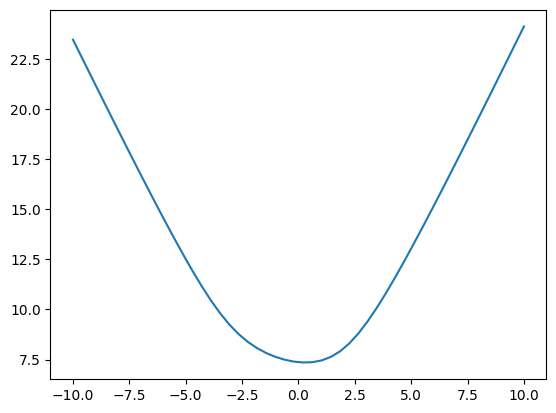

In [ ]:
plt.plot(x,y)

In [ ]:
def derivada(f,x,h=1e-5):
  return (f(x+h) - f(x-h))/(2*h)

def SegundaDerivada(f,x,h=1e-5):
  return (f(x+h) - 2*f(x) + f(x-h))/h**2


In [ ]:
derivadadistancia = derivada(tiempo,x)


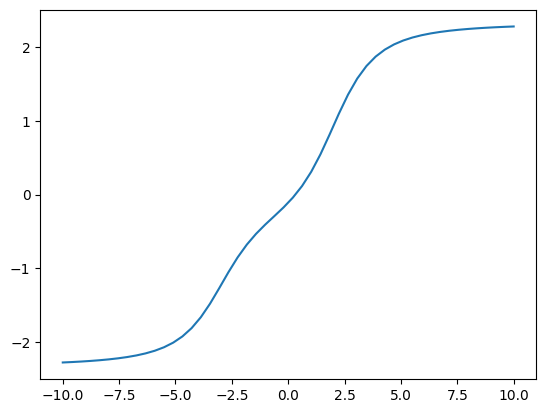

In [ ]:
plt.plot(x,derivadadistancia)

In [ ]:
def GetNewtonMethod(f,g,df,xn,itmax=1000,precision=1e-16):

  error = 1
  it = 0

  while error > precision and it < itmax:
    try:
      xn1 = xn - f(g,xn)/df(g,xn)
      error = np.abs(f(g,xn)/df(g,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1

  if it == itmax:
    return False
  else:
    return xn

In [ ]:
raiz = GetNewtonMethod(derivada,tiempo,SegundaDerivada,-1)
raiz

0.3169057570926729

In [ ]:
L = np.array([raiz,0])
#alpha0
componentesx = L[0] - T[0]
componentey = T[1]
a = componentesx/componentey
#alpha1
componentex1 = R[0]-L[0]
componentey1 = R[1]
b = componentex1/componentey1

In [ ]:
alpha0 = np.arctan(a)
z = alpha0*180/np.pi
z

58.911215936753294

In [ ]:
alpha1 = np.abs(np.arctan(b))
w = alpha1*180/np.pi
w

40.08219173842012

In [ ]:
exacto = 1/1.33
exacto

0.7518796992481203

In [ ]:

snell = np.sin(alpha1)/(np.sin(alpha0))
snell

0.7518796992735799

In [ ]:
er = np.abs(exacto - snell)
er

2.545963440070409e-11